In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [11]:
df1 = pd.read_csv('train_energy_data.csv')
df2 = pd.read_csv('test_energy_data.csv')
df = pd.concat([df1,df2],axis = 0).sample(frac = 1)
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
584,Commercial,28029,38,15,18.72,Weekend,3987.84
488,Commercial,25057,86,32,30.61,Weekday,4649.81
652,Commercial,27237,39,41,15.33,Weekend,4495.21
667,Industrial,10003,3,47,10.74,Weekend,3916.46
544,Residential,20644,29,7,21.54,Weekday,2904.51
...,...,...,...,...,...,...,...
141,Residential,34072,12,13,29.68,Weekend,3435.18
433,Residential,8473,9,22,12.10,Weekday,2443.16
230,Industrial,24660,32,5,23.67,Weekend,4034.64
735,Residential,22227,56,49,12.86,Weekend,4087.05


In [12]:
row,col = df.shape
print("No of rows = ",row)
print("No of cols = ",col)

No of rows =  1100
No of cols =  7


In [13]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25500.527273,48.268182,25.730000,22.559745,4168.191273
std,14236.955632,29.127624,14.116209,7.122357,924.278723
min,560.000000,1.000000,1.000000,10.050000,1683.950000
25%,13203.750000,22.000000,13.000000,16.365000,3510.460000
50%,25785.500000,47.000000,26.000000,22.810000,4189.690000
75%,37536.750000,73.000000,38.000000,28.760000,4859.510000
max,49997.000000,99.000000,49.000000,34.990000,6530.600000


In [14]:
df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 584 to 207
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 68.8+ KB


# EDA

In [16]:
cols  = df.columns
cols

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [17]:
# sns.pairplot(df)

In [18]:
auto1=df[['Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature',
       'Energy Consumption']]
auto1.corr()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
Square Footage,1.000000,0.023133,-0.024825,0.027354,0.770765
Number of Occupants,0.023133,1.000000,0.024318,0.007351,0.350280
Appliances Used,-0.024825,0.024318,1.000000,-0.069989,0.301505
Average Temperature,0.027354,0.007351,-0.069989,1.000000,-0.038206
Energy Consumption,0.770765,0.350280,0.301505,-0.038206,1.000000


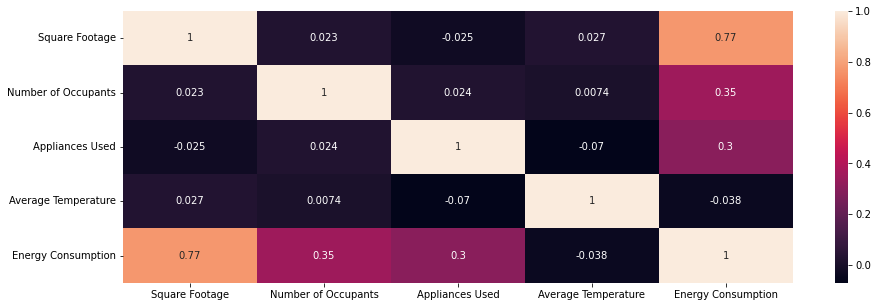

In [19]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto1.corr(),annot=True)
plt.show()

In [20]:
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
584,Commercial,28029,38,15,18.72,Weekend,3987.84
488,Commercial,25057,86,32,30.61,Weekday,4649.81
652,Commercial,27237,39,41,15.33,Weekend,4495.21
667,Industrial,10003,3,47,10.74,Weekend,3916.46
544,Residential,20644,29,7,21.54,Weekday,2904.51
...,...,...,...,...,...,...,...
141,Residential,34072,12,13,29.68,Weekend,3435.18
433,Residential,8473,9,22,12.10,Weekday,2443.16
230,Industrial,24660,32,5,23.67,Weekend,4034.64
735,Residential,22227,56,49,12.86,Weekend,4087.05


In [21]:
df.drop(['Average Temperature'],axis = 1,inplace = True)

In [22]:
# Dimension reduction

In [23]:
building = pd.get_dummies(df['Building Type'], drop_first = False)
building

,Commercial,Industrial,Residential
584,1,0,0
488,1,0,0
652,1,0,0
667,0,1,0
544,0,0,1
...,...,...,...
141,0,0,1
433,0,0,1
230,0,1,0
735,0,0,1


In [24]:
auto = pd.concat([df, building], axis = 1)
auto

,Building Type,Square Footage,Number of Occupants,Appliances Used,Day of Week,Energy Consumption,Commercial,Industrial,Residential
584,Commercial,28029,38,15,Weekend,3987.84,1,0,0
488,Commercial,25057,86,32,Weekday,4649.81,1,0,0
652,Commercial,27237,39,41,Weekend,4495.21,1,0,0
667,Industrial,10003,3,47,Weekend,3916.46,0,1,0
544,Residential,20644,29,7,Weekday,2904.51,0,0,1
...,...,...,...,...,...,...,...,...,...
141,Residential,34072,12,13,Weekend,3435.18,0,0,1
433,Residential,8473,9,22,Weekday,2443.16,0,0,1
230,Industrial,24660,32,5,Weekend,4034.64,0,1,0
735,Residential,22227,56,49,Weekend,4087.05,0,0,1


In [25]:
auto['Day of Week'] = auto['Day of Week'].map({'Weekend':2,'Weekday':7})
auto

,Building Type,Square Footage,Number of Occupants,Appliances Used,Day of Week,Energy Consumption,Commercial,Industrial,Residential
584,Commercial,28029,38,15,2,3987.84,1,0,0
488,Commercial,25057,86,32,7,4649.81,1,0,0
652,Commercial,27237,39,41,2,4495.21,1,0,0
667,Industrial,10003,3,47,2,3916.46,0,1,0
544,Residential,20644,29,7,7,2904.51,0,0,1
...,...,...,...,...,...,...,...,...,...
141,Residential,34072,12,13,2,3435.18,0,0,1
433,Residential,8473,9,22,7,2443.16,0,0,1
230,Industrial,24660,32,5,2,4034.64,0,1,0
735,Residential,22227,56,49,2,4087.05,0,0,1


In [26]:
auto = auto.drop(['Building Type'],axis = 1)
auto

,Square Footage,Number of Occupants,Appliances Used,Day of Week,Energy Consumption,Commercial,Industrial,Residential
584,28029,38,15,2,3987.84,1,0,0
488,25057,86,32,7,4649.81,1,0,0
652,27237,39,41,2,4495.21,1,0,0
667,10003,3,47,2,3916.46,0,1,0
544,20644,29,7,7,2904.51,0,0,1
...,...,...,...,...,...,...,...,...
141,34072,12,13,2,3435.18,0,0,1
433,8473,9,22,7,2443.16,0,0,1
230,24660,32,5,2,4034.64,0,1,0
735,22227,56,49,2,4087.05,0,0,1


In [27]:
auto.corr()

,Square Footage,Number of Occupants,Appliances Used,Day of Week,Energy Consumption,Commercial,Industrial,Residential
Square Footage,1.000000,0.023133,-0.024825,0.006825,0.770765,-0.035704,0.021486,0.014159
Number of Occupants,0.023133,1.000000,0.024318,-0.013912,0.350280,-0.010173,0.026050,-0.015417
Appliances Used,-0.024825,0.024318,1.000000,0.013758,0.301505,0.016967,0.000245,-0.016934
Day of Week,0.006825,-0.013912,0.013758,1.000000,0.017484,-0.009012,-0.022698,0.031024
Energy Consumption,0.770765,0.350280,0.301505,0.017484,1.000000,-0.011709,0.406179,-0.384949
Commercial,-0.035704,-0.010173,0.016967,-0.009012,-0.011709,1.000000,-0.479445,-0.515985
Industrial,0.021486,0.026050,0.000245,-0.022698,0.406179,-0.479445,1.000000,-0.504340
Residential,0.014159,-0.015417,-0.016934,0.031024,-0.384949,-0.515985,-0.504340,1.000000


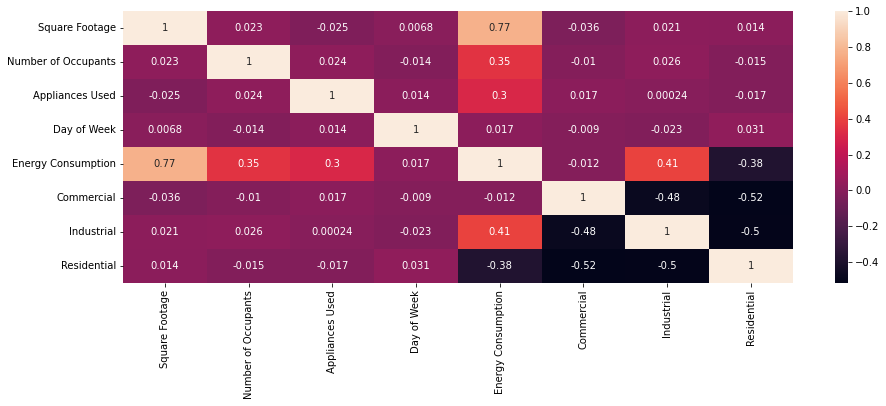

In [28]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(auto, train_size = 0.85, test_size = 0.15, random_state = 1)

In [30]:
df_train

,Square Footage,Number of Occupants,Appliances Used,Day of Week,Energy Consumption,Commercial,Industrial,Residential
844,781,4,34,7,2696.49,1,0,0
717,11289,11,26,2,3602.33,0,1,0
139,29878,16,41,2,4315.75,1,0,0
90,31178,26,11,7,3451.58,0,0,1
223,45047,13,45,7,5750.07,0,1,0
...,...,...,...,...,...,...,...,...
479,17274,97,46,7,4724.76,1,0,0
66,18350,86,18,2,4575.58,0,1,0
433,8473,9,22,7,2443.16,0,0,1
895,4314,43,17,2,2330.09,0,0,1


In [31]:
df_train.shape

(935, 8)

In [32]:
df_test.shape

(165, 8)

In [33]:
y_train = df_train['Energy Consumption']
X_train = df_train.drop(['Energy Consumption'],axis = 1)

y_train = y_train.astype('int')

In [35]:
# # for linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

# #for logistic regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=100)
lg_model = lg.fit(X_train, y_train)

# # # # # # #for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X_train)
# Y_poly = poly_reg.fit_transform(y_train)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y_train)
# poly_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
#train acc
print("Linear regression = ",lr_model.score(X_train, y_train)*100)
print("Logistic regression = ",lg_model.score(X_train, y_train)*100)
print("Polynomial regression = ",model.score(poly_reg.fit_transform(X_train), y_train)*100)

Linear regression =  99.85100145649044
Logistic regression =  0.9625668449197862
Polynomial regression =  65.14164154146644


In [39]:
#test acc
test_data = df_test
y_test = test_data['Energy Consumption'].astype('int')
X_test = test_data.drop(['Energy Consumption'],axis = 1)

print("Linear regression = ",lr_model.score(X_test, y_test)*100)
print("Logistic regression = ",lg_model.score(X_test, y_test)*100)
print("Polynomial regression = ",model.score(poly_reg.fit_transform(X_test), y_test)*100)

Linear regression =  99.86157338680431
Logistic regression =  0.0
Polynomial regression =  76.34721337918961


In [40]:
# #to dump model
import pickle as pk
filename = 'model.pickle'
pk.dump(lr_model, open(filename, 'wb'))

In [41]:
# print(data)
Square_Footage = [int(input("Enter Square Footage = ")) for i in range(1)]
Number_of_Occupants = [int(input("Enter Number of Occupants = ")) for i in range(1)]
Appliances_Used = [int(input("Enter Appliances Used = ")) for i in range(1)]
Day_of_Week = [int(input("Enter Day of Week = ")) for i in range(1)]
Commercial = [int(input("Enter 1 for Commercial otherwise 0  = ")) for i in range(1)]
Industrial = [int(input("Enter 1 for Industrial otherwise 0 = ")) for i in range(1)]
Residential  = [int(input("Enter 1 for Residential otherwise 0 = ")) for i in range(1)]

df = pd.DataFrame({'Square Footage':Square_Footage,
                   'Number of Occupants':Number_of_Occupants,
                   'Appliances Used':Appliances_Used,
                   'Day of Week':Day_of_Week,
                   'Commercial':Commercial,
                   'Industrial':Industrial,
                   'Residential':Residential})
print(df)
predicted_energy_consumption = lr_model.predict(df)
# # print("Actual Salary",actual_salary)
# print("predicted Salary",np.round(predicted_salary,2))
print(predicted_energy_consumption)
# df

Enter Square Footage = 3000
Enter Number of Occupants = 50
Enter Appliances Used = 50
Enter Day of Week = 4
Enter 1 for Commercial otherwise 0  = 1
Enter 1 for Industrial otherwise 0 = 0
Enter 1 for Residential otherwise 0 = 0
   Square Footage  Number of Occupants  Appliances Used  Day of Week  \
0            3000                   50               50            4   

   Commercial  Industrial  Residential  
0           1           0            0  
[3563.86068365]
